## WeatherPy Analysis
1. As latitude approaches 0, the temperature increases 
2. Humidity varies, but is around 60% or higher at latitude = 0 and and remains high near the equator
3. Cloudiness varies, and it does not seem like there is a trend based on latitude
4. Weed spind also varies, but decreases some as latitude approaches 0

In [61]:
! pip install citipy

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [88]:
import csv 
import json
import random 
import requests
import pandas as pd
import matplotlib.pyplot as plt
from config import api_key
from citipy import citipy

In [63]:
lat = []
long = [] 
cities = []
temp = []
humidity = []
cloudiness = []
wind_speed = [] 

In [64]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [65]:
for x in range(500):
    long.append(random.randint(-180, 180))
    lat.append(random.randint(-90, 90))
print(long)
print(lat)

[-25, 102, 67, -137, 14, 65, 118, -47, -164, -69, 131, -20, 173, -34, 152, 99, 90, 121, 67, 74, -81, 98, -13, -39, -48, 140, -154, -167, 37, -26, -53, 134, -95, 4, 143, 51, 82, 19, -28, 138, 140, 62, -158, 72, -145, -10, 114, -74, -127, 36, -122, -56, 10, 70, -152, -85, 57, -5, -128, -108, 118, -167, 65, -110, 109, -155, -112, -24, -111, 32, -118, -92, 23, -1, -131, -42, -44, -84, 27, -108, 10, -24, -109, 87, -3, -89, 111, -102, -128, 63, 173, -3, -168, 83, 134, 99, 53, -95, 60, -121, 140, 98, 141, -100, -15, 148, 42, -11, 79, 135, -105, 21, -75, -16, -67, -6, 104, 14, -52, 13, 22, 74, 96, 165, -23, -168, -113, -151, -102, -155, 48, 114, -26, 55, 31, -59, 161, 109, 148, 21, -59, -70, -58, 122, -102, 162, 76, -37, -24, -18, 173, -79, -161, 55, -111, 168, 100, -118, -148, -22, -4, -163, -6, -20, -6, 141, -94, 83, 117, -8, -172, 5, 6, 110, 21, -22, 147, -52, -52, -147, -132, 155, 141, -101, 42, 117, -131, 94, 23, -160, -37, -95, -124, 91, 164, -86, 34, -112, 92, -13, -82, -86, -86, 180, -

In [66]:
for x,y in zip(lat,long):
    city = citipy.nearest_city(x,y)
    cities.append(city.city_name)
print(cities)

['arraial do cabo', 'khatanga', 'taolanaro', 'rikitea', 'sembe', 'taolanaro', 'albany', 'qaqortoq', 'kapaa', 'san rafael', 'portland', 'vestmannaeyjar', 'butaritari', 'caravelas', 'srednekolymsk', 'bengkulu', 'turukhansk', 'albany', 'zhezkazgan', 'dikson', 'ushuaia', 'baykit', 'cape town', 'ushuaia', 'mar del plata', 'kiunga', 'faanui', 'kapaa', 'povarovo', 'los llanos de aridane', 'ushuaia', 'tsuyama', 'gardner', 'cape town', 'new norfolk', 'port alfred', 'dikson', 'tromso', 'cidreira', 'mount gambier', 'mount isa', 'sukhoy log', 'hilo', 'atasu', 'mataura', 'sorvag', 'karratha', 'talcahuano', 'port hardy', 'tumannyy', 'rikitea', 'ushuaia', 'saldanha', 'grand river south east', 'faanui', 'talara', 'belushya guba', 'quimper', 'atuona', 'puerto ayora', 'albany', 'nome', 'saint-philippe', 'punta arenas', 'busselton', 'kapaa', 'yellowknife', 'chuy', 'rikitea', 'muleba', 'rikitea', 'thompson', 'senanga', 'cape town', 'atuona', 'ribeira grande', 'bocaiuva', 'thomasville', 'marawi', 'punta ar

In [67]:
weather_data = requests.get(f"{url}appid={api_key}&units={units}&lat={x}&long={y}")

In [68]:
for x,y in zip(lat,long):
    query_url = f"{url}appid={api_key}&units={units}&lat={x}&lon={y}"
    weather_data = requests.get(query_url).json()
    
    try: 
        temp.append(weather_data["main"]["temp_max"])
        humidity.append(weather_data["main"]["humidity"])
        cloudiness.append(weather_data["clouds"]["all"])
        wind_speed.append(weather_data["wind"]["speed"])
    
    except (KeyError, IndexError): 
        temp.append(" ")
        humidity.append(" ")
        cloudiness.append(" ")
        wind_speed.append(" ")

In [69]:
weather_df = pd.DataFrame({
    "City": cities, 
    "Latitude": lat, 
    "Longitude": long, 
    "Temperature": temp, 
    "Humidity": humidity, 
    "Cloudiness": cloudiness, 
    "Wind Speed": wind_speed})
weather_df.head()

,City,Cloudiness,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,arraial do cabo,88,95,-47,-25,44.74,22.08
1,khatanga,0,97,78,102,33.04,4.52
2,taolanaro,0,0,-77,67,-50.40,24.43
3,rikitea,8,100,-52,-137,40.32,20.07
4,sembe,92,100,1,14,70.11,2.73


Text(0.5,1,'Temperature (F) v. Latitude')

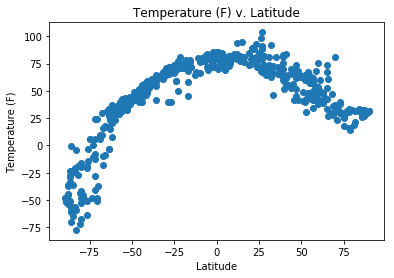

In [85]:
plt.scatter(weather_df["Latitude"], weather_df["Temperature"])
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.title("Temperature (F) v. Latitude")

Text(0.5,1,'Humidity (%) v. Latitude')

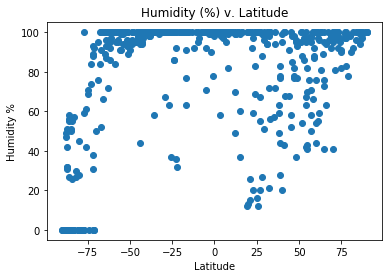

In [84]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"])
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.title("Humidity (%) v. Latitude")

Text(0.5,1,'Cloudiness (%) v. Latitude')

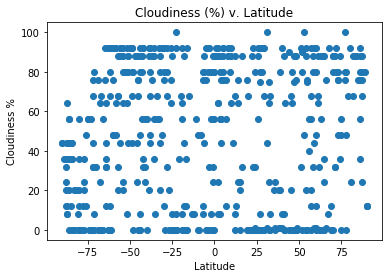

In [86]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"])
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.title("Cloudiness (%) v. Latitude")

Text(0.5,1,'Wind Speed (mph) v. Latitude')

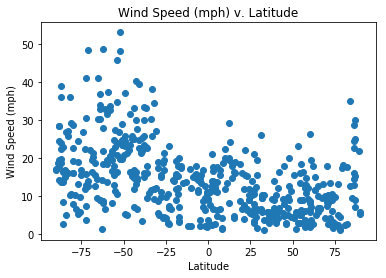

In [87]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"])
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("Wind Speed (mph) v. Latitude")